In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
portfolio3 = pd.read_csv('estaticos_portfolio3.csv')
market = pd.read_csv('market_features.csv')
portfolio1 = pd.read_csv('estaticos_portfolio1.csv')
portfolio2 = pd.read_csv('estaticos_portfolio2.csv')


In [21]:
portfolio1 = portfolio1.drop(['Unnamed: 0'], axis = 1)
portfolio2 = portfolio2.drop(['Unnamed: 0'], axis = 1)
portfolio3 = portfolio3.drop(['Unnamed: 0'], axis = 1)
market = market.drop(['Unnamed: 0'], axis = 1)

In [22]:
print('Shape do Portfolio1 é', portfolio1.shape)
print('Shape do Portfolio2 é', portfolio2.shape)
print('Shape do Portfolio3 é', portfolio3.shape)
print('Shape do Market é', market.shape)

Shape do Portfolio1 é (555, 181)
Shape do Portfolio2 é (566, 1)
Shape do Portfolio3 é (265, 1)
Shape do Market é (462298, 37)


In [6]:
pd.set_option('display.max_columns', 500)

In [23]:
market.head()

id  fl_matriz sg_uf  \
0  a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...       True    RN   
1  6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...       True    PI   
2  4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...       True    AM   
3  3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...       True    AM   
4  1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...       True    RN   

  natureza_juridica_macro                                         de_ramo  \
0  ENTIDADES EMPRESARIAIS                         INDUSTRIA DA CONSTRUCAO   
1                  OUTROS              SERVICOS DE ALOJAMENTO/ALIMENTACAO   
2                  OUTROS               TRANSPORTE, ARMAZENAGEM E CORREIO   
3                  OUTROS                               SERVICOS DIVERSOS   
4                  OUTROS  SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS   

              setor  idade_empresa_anos idade_emp_cat  fl_me  fl_sa  fl_mei  \
0  CONSTRUÇÃO CIVIL           14.457534       10 a 15  False  False   False   
1           SERVIÇO            1.463014         1 a 5  False  False    True   
2           SERVIÇO            7.093151        5 a 10  False  False    True   
3           SERVIÇO            6.512329        5 a 10  False  False   False   
4           SERVIÇO            3.200000         1 a 5  False  False   False   

   fl_ltda  fl_st_especial  fl_email  fl_telefone  fl_rm  \
0    False           False      True         True   True   
1    False           False      True         True   True   
2    False           False     False         True   True   
3    False           False      True         True   True   
4    False           False      True         True   True   

                                          nm_divisao  \
0                            CONSTRUCAO DE EDIFICIOS   
1                                        ALIMENTACAO   
2                               TRANSPORTE TERRESTRE   
3  REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...   
4  SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...   

                                       nm_segmento  fl_spa  fl_antt  \
0                                       CONSTRUCAO   False    False   
1                         ALOJAMENTO E ALIMENTACAO   False    False   
2                 TRANSPORTE ARMAZENAGEM E CORREIO   False    False   
3                    OUTRAS ATIVIDADES DE SERVICOS   False    False   
4  ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS   False    False   

   fl_veiculo  vl_total_veiculos_pesados_grupo  vl_total_veiculos_leves_grupo  \
0       False                              0.0                            0.0   
1       False                              0.0                            0.0   
2       False                              0.0                            0.0   
3       False                              0.0                            0.0   
4       False                              0.0                            0.0   

  sg_uf_matriz de_saude_tributaria de_saude_rescencia  nu_meses_rescencia  \
0           RN               VERDE     ACIMA DE 1 ANO                23.0   
1           PI               CINZA          ATE 1 ANO                 9.0   
2           AM             AMARELO     ACIMA DE 1 ANO                26.0   
3           AM             AMARELO     ACIMA DE 1 ANO                26.0   
4           RN               VERDE     ACIMA DE 1 ANO                27.0   

  de_nivel_atividade  fl_simples_irregular          nm_meso_regiao  \
0               ALTA                 False          LESTE POTIGUAR   
1              BAIXA                 False  CENTRO NORTE PIAUIENSE   
2              MEDIA                 False       CENTRO AMAZONENSE   
3              MEDIA                 False       CENTRO AMAZONENSE   
4               ALTA                 False          LESTE POTIGUAR   

  nm_micro_regiao  fl_passivel_iss         de_faixa_faturamento_estimado  \
0           NATAL             True  DE R$ 1.500.000,01 A R$ 4.800.000,00   
1        TERESINA        

In [24]:
market.dtypes

id                                      object
fl_matriz                                 bool
sg_uf                                   object
natureza_juridica_macro                 object
de_ramo                                 object
setor                                   object
idade_empresa_anos                     float64
idade_emp_cat                           object
fl_me                                     bool
fl_sa                                     bool
fl_mei                                    bool
fl_ltda                                   bool
fl_st_especial                            bool
fl_email                                  bool
fl_telefone                               bool
fl_rm                                     bool
nm_divisao                              object
nm_segmento                             object
fl_spa                                    bool
fl_antt                                   bool
fl_veiculo                                bool
vl_total_veic

In [25]:
# Preenchendo os valores NaN's numericos
for i in market.select_dtypes(['int64','float64']).columns:
    market[i] = market[i].fillna(market[i].mean())
    
# Preenchendo os valores NaN's categoricos
for i in market.select_dtypes('object').columns:
    market[i] = market[i].fillna('other')

In [26]:
market.isna().sum()

id                                     0
fl_matriz                              0
sg_uf                                  0
natureza_juridica_macro                0
de_ramo                                0
setor                                  0
idade_empresa_anos                     0
idade_emp_cat                          0
fl_me                                  0
fl_sa                                  0
fl_mei                                 0
fl_ltda                                0
fl_st_especial                         0
fl_email                               0
fl_telefone                            0
fl_rm                                  0
nm_divisao                             0
nm_segmento                            0
fl_spa                                 0
fl_antt                                0
fl_veiculo                             0
vl_total_veiculos_pesados_grupo        0
vl_total_veiculos_leves_grupo          0
sg_uf_matriz                           0
de_saude_tributa

In [27]:
market.dtypes

id                                      object
fl_matriz                                 bool
sg_uf                                   object
natureza_juridica_macro                 object
de_ramo                                 object
setor                                   object
idade_empresa_anos                     float64
idade_emp_cat                           object
fl_me                                     bool
fl_sa                                     bool
fl_mei                                    bool
fl_ltda                                   bool
fl_st_especial                            bool
fl_email                                  bool
fl_telefone                               bool
fl_rm                                     bool
nm_divisao                              object
nm_segmento                             object
fl_spa                                    bool
fl_antt                                   bool
fl_veiculo                                bool
vl_total_veic

In [28]:
# Transformando os dados em dummies
market_dummies = market.drop('id',axis=1)
market_dummies = pd.concat([market_dummies.select_dtypes(['int64', 'bool','float64']),
                              pd.get_dummies(market_dummies.select_dtypes(['object']))], axis=1)

# Tirando caracteres especiais e inadequados das colunas
def corrigir_nomes(nome):
    nome = nome.replace('.','').replace('-','').replace(':','_').replace('R$','').replace('  ',
                        ' ').replace(';','').replace('<=','menorOuIgual').replace('>','maior').replace('Ç',
                        'C').replace('Ã','A').replace(',','').replace('/','_').replace(' ','_')
    return nome

market_dummies = market_dummies.rename(columns = lambda x: corrigir_nomes(x))

market_dummies.head()

fl_matriz  idade_empresa_anos  fl_me  fl_sa  fl_mei  fl_ltda  \
0       True           14.457534  False  False   False    False   
1       True            1.463014  False  False    True    False   
2       True            7.093151  False  False    True    False   
3       True            6.512329  False  False   False    False   
4       True            3.200000  False  False   False    False   

   fl_st_especial  fl_email  fl_telefone  fl_rm  fl_spa  fl_antt  fl_veiculo  \
0           False      True         True   True   False    False       False   
1           False      True         True   True   False    False       False   
2           False     False         True   True   False    False       False   
3           False      True         True   True   False    False       False   
4           False      True         True   True   False    False       False   

   vl_total_veiculos_pesados_grupo  vl_total_veiculos_leves_grupo  \
0                              0.0                            0.0   
1                              0.0                            0.0   
2                              0.0                            0.0   
3                              0.0                            0.0   
4                              0.0                            0.0   

   nu_meses_rescencia  fl_simples_irregular  fl_passivel_iss  \
0                23.0                 False             True   
1                 9.0                 False             True   
2                26.0                 False             True   
3                26.0                 False             True   
4                27.0                 False             True   

   vl_faturamento_estimado_aux  vl_faturamento_estimado_grupo_aux  qt_filiais  \
0                    3132172.8                          3132172.8           0   
1                     210000.0                           210000.0           0   
2                      50000.0                            50000.0           0   
3                     210000.0                           210000.0           0   
4                     210000.0                           210000.0           0   

   sg_uf_AC  sg_uf_AM  sg_uf_MA  sg_uf_PI  sg_uf_RN  sg_uf_RO  \
0         0         0         0         0         1         0   
1         0         0         0         1         0         0   
2         0         1         0         0         0         0   
3         0         1         0         0         0         0   
4         0         0         0         0         1         0   

   natureza_juridica_macro_ADMINISTRACAO_PUBLICA  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   natureza_juridica_macro_CARGO_POLITICO  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   natureza_juridica_macro_ENTIDADES_EMPRESARIAIS  \
0                                               1   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   natureza_juridica_macro_ENTIDADES_SEM_FINS_LUCRATIVOS  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   natureza_juridica_macro_INSTITUICOES_EXTRATERRITORIAIS  \
0                                                  0        
1                                                  0   

In [29]:
market_dummies.shape

(462298, 354)

## Padronização

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
# Padronizando os dados
market_dummies_stdscaler = StandardScaler().fit_transform(market_dummies.select_dtypes(['float64','int64']))
market_dummies_stdscaler = pd.DataFrame(market_dummies_stdscaler)
colunas_int_float = market_dummies.select_dtypes(['float64','int64']).columns

market_dummies_stdscaler.columns = colunas_int_float

market_dummies_stdscaler = pd.concat([market_dummies_stdscaler, market_dummies.select_dtypes(['bool','uint8'])], axis=1)

In [35]:
market_dummies_stdscaler.head()

idade_empresa_anos  vl_total_veiculos_pesados_grupo  \
0            0.468908                        -0.049577   
1           -0.882484                        -0.049577   
2           -0.296966                        -0.049577   
3           -0.357370                        -0.049577   
4           -0.701843                        -0.049577   

   vl_total_veiculos_leves_grupo  nu_meses_rescencia  \
0                      -0.040442           -0.218332   
1                      -0.040442           -1.741135   
2                      -0.040442            0.107983   
3                      -0.040442            0.107983   
4                      -0.040442            0.216755   

   vl_faturamento_estimado_aux  vl_faturamento_estimado_grupo_aux  qt_filiais  \
0                     0.077506                          -0.048349   -0.061322   
1                    -0.019695                          -0.048772   -0.061322   
2                    -0.025017                          -0.048795   -0.061322   
3                    -0.019695                          -0.048772   -0.061322   
4                    -0.019695                          -0.048772   -0.061322   

   fl_matriz  fl_me  fl_sa  fl_mei  fl_ltda  fl_st_especial  fl_email  \
0       True  False  False   False    False           False      True   
1       True  False  False    True    False           False      True   
2       True  False  False    True    False           False     False   
3       True  False  False   False    False           False      True   
4       True  False  False   False    False           False      True   

   fl_telefone  fl_rm  fl_spa  fl_antt  fl_veiculo  fl_simples_irregular  \
0         True   True   False    False       False                 False   
1         True   True   False    False       False                 False   
2         True   True   False    False       False                 False   
3         True   True   False    False       False                 False   
4         True   True   False    False       False                 False   

   fl_passivel_iss  sg_uf_AC  sg_uf_AM  sg_uf_MA  sg_uf_PI  sg_uf_RN  \
0             True         0         0         0         0         1   
1             True         0         0         0         1         0   
2             True         0         1         0         0         0   
3             True         0         1         0         0         0   
4             True         0         0         0         0         1   

   sg_uf_RO  natureza_juridica_macro_ADMINISTRACAO_PUBLICA  \
0         0                                              0   
1         0                                              0   
2         0                                              0   
3         0                                              0   
4         0                                              0   

   natureza_juridica_macro_CARGO_POLITICO  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   natureza_juridica_macro_ENTIDADES_EMPRESARIAIS  \
0                                               1   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   natureza_juridica_macro_ENTIDADES_SEM_FINS_LUCRATIVOS  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   natureza_juridica_macro_INSTITUICOES_EXTRATERRITORIAIS  \
0                                                  0        
1                                                  0   

In [36]:
# Convertendo as colunas bool em valores 1 e 0    
for i in market_dummies_stdscaler.select_dtypes(bool).columns:
    market_dummies_stdscaler[i] = np.where(market_dummies_stdscaler[i] == True, 1,0)

In [37]:
market_dummies_stdscaler.head()

idade_empresa_anos  vl_total_veiculos_pesados_grupo  \
0            0.468908                        -0.049577   
1           -0.882484                        -0.049577   
2           -0.296966                        -0.049577   
3           -0.357370                        -0.049577   
4           -0.701843                        -0.049577   

   vl_total_veiculos_leves_grupo  nu_meses_rescencia  \
0                      -0.040442           -0.218332   
1                      -0.040442           -1.741135   
2                      -0.040442            0.107983   
3                      -0.040442            0.107983   
4                      -0.040442            0.216755   

   vl_faturamento_estimado_aux  vl_faturamento_estimado_grupo_aux  qt_filiais  \
0                     0.077506                          -0.048349   -0.061322   
1                    -0.019695                          -0.048772   -0.061322   
2                    -0.025017                          -0.048795   -0.061322   
3                    -0.019695                          -0.048772   -0.061322   
4                    -0.019695                          -0.048772   -0.061322   

   fl_matriz  fl_me  fl_sa  fl_mei  fl_ltda  fl_st_especial  fl_email  \
0          1      0      0       0        0               0         1   
1          1      0      0       1        0               0         1   
2          1      0      0       1        0               0         0   
3          1      0      0       0        0               0         1   
4          1      0      0       0        0               0         1   

   fl_telefone  fl_rm  fl_spa  fl_antt  fl_veiculo  fl_simples_irregular  \
0            1      1       0        0           0                     0   
1            1      1       0        0           0                     0   
2            1      1       0        0           0                     0   
3            1      1       0        0           0                     0   
4            1      1       0        0           0                     0   

   fl_passivel_iss  sg_uf_AC  sg_uf_AM  sg_uf_MA  sg_uf_PI  sg_uf_RN  \
0                1         0         0         0         0         1   
1                1         0         0         0         1         0   
2                1         0         1         0         0         0   
3                1         0         1         0         0         0   
4                1         0         0         0         0         1   

   sg_uf_RO  natureza_juridica_macro_ADMINISTRACAO_PUBLICA  \
0         0                                              0   
1         0                                              0   
2         0                                              0   
3         0                                              0   
4         0                                              0   

   natureza_juridica_macro_CARGO_POLITICO  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   natureza_juridica_macro_ENTIDADES_EMPRESARIAIS  \
0                                               1   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   natureza_juridica_macro_ENTIDADES_SEM_FINS_LUCRATIVOS  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   natureza_juridica_macro_INSTITUICOES_EXTRATERRITORIAIS  \
0                                                  0        
1                                                  0   

In [38]:
market_dummies_stdscaler.shape

(462298, 354)

In [39]:
market_dummies_stdscaler['id'] = market['id']

In [42]:
market_dummies_stdscaler.head()

idade_empresa_anos  vl_total_veiculos_pesados_grupo  \
0            0.468908                        -0.049577   
1           -0.882484                        -0.049577   
2           -0.296966                        -0.049577   
3           -0.357370                        -0.049577   
4           -0.701843                        -0.049577   

   vl_total_veiculos_leves_grupo  nu_meses_rescencia  \
0                      -0.040442           -0.218332   
1                      -0.040442           -1.741135   
2                      -0.040442            0.107983   
3                      -0.040442            0.107983   
4                      -0.040442            0.216755   

   vl_faturamento_estimado_aux  vl_faturamento_estimado_grupo_aux  qt_filiais  \
0                     0.077506                          -0.048349   -0.061322   
1                    -0.019695                          -0.048772   -0.061322   
2                    -0.025017                          -0.048795   -0.061322   
3                    -0.019695                          -0.048772   -0.061322   
4                    -0.019695                          -0.048772   -0.061322   

   fl_matriz  fl_me  fl_sa  fl_mei  fl_ltda  fl_st_especial  fl_email  \
0          1      0      0       0        0               0         1   
1          1      0      0       1        0               0         1   
2          1      0      0       1        0               0         0   
3          1      0      0       0        0               0         1   
4          1      0      0       0        0               0         1   

   fl_telefone  fl_rm  fl_spa  fl_antt  fl_veiculo  fl_simples_irregular  \
0            1      1       0        0           0                     0   
1            1      1       0        0           0                     0   
2            1      1       0        0           0                     0   
3            1      1       0        0           0                     0   
4            1      1       0        0           0                     0   

   fl_passivel_iss  sg_uf_AC  sg_uf_AM  sg_uf_MA  sg_uf_PI  sg_uf_RN  \
0                1         0         0         0         0         1   
1                1         0         0         0         1         0   
2                1         0         1         0         0         0   
3                1         0         1         0         0         0   
4                1         0         0         0         0         1   

   sg_uf_RO  natureza_juridica_macro_ADMINISTRACAO_PUBLICA  \
0         0                                              0   
1         0                                              0   
2         0                                              0   
3         0                                              0   
4         0                                              0   

   natureza_juridica_macro_CARGO_POLITICO  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   natureza_juridica_macro_ENTIDADES_EMPRESARIAIS  \
0                                               1   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   natureza_juridica_macro_ENTIDADES_SEM_FINS_LUCRATIVOS  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   natureza_juridica_macro_INSTITUICOES_EXTRATERRITORIAIS  \
0                                                  0        
1                                                  0   

## Analisando se os ids estão presentes nos 3 portfólios, se está só em 2 ou só em 1 portfólio

In [43]:
port1 = list(portfolio1['id'])
port2 = list(portfolio2['id'])
port3 = list(portfolio3['id'])

In [44]:
port1_port2 = [x for x in port1 if x in port2]
port1_port3 = [x for x in port1 if x in port3]
port2_port3 = [x for x in port2 if x in port3]
port1_port2_port3 = [x for x in port1 if x in port2 and port3]

In [45]:
print(f"Port1 and Port2: {len(port1_port2)}")
print(f"Port1 and Port3: {len(port1_port3)}")
print(f"Port2 and Port3: {len(port2_port3)}")
print(f"Port1, Port2 and Port3: {len(port1_port2_port3)}")

Port1 and Port2: 0
Port1 and Port3: 0
Port2 and Port3: 108
Port1, Port2 and Port3: 0


# Pegando os ids do Market que não estão em nenhum portfólio

In [46]:
df = pd.concat([portfolio1,portfolio2,portfolio3], axis=0)
df = pd.DataFrame(df.id)

/home/luiz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [50]:
df2 = market_dummies_stdscaler

In [53]:
merge_not = df2[~df2['id'].isin(df['id'])]

# Merge nos portfólios  com o market

In [54]:
df_portfolio2 = pd.merge(portfolio2, market_dummies_stdscaler, on='id')
df_portfolio3 = pd.merge(portfolio3, market_dummies_stdscaler, on='id')

In [55]:
df_portfolio1 = pd.merge(portfolio1.id, market_dummies_stdscaler, on='id')

#### Tirando uma amostra do portfólio 1 para depois colocar na base de teste para verificar se serão recomendados para o portfólio 1

In [56]:
df_portfolio1.shape

(555, 355)

In [57]:
df_portfolio1_part = df_portfolio1[0:490]

In [58]:
amostra_port1 = df_portfolio1[490:]

## Criando um portfólio 4 que será os ids que estão no portfólio 2 e 3

In [59]:
portfolio4 = pd.DataFrame(port2_port3, columns = ['id'])

In [60]:
portfolio4.head()

id
0  16843c9ffb920170477118933798510d8d5f00f5c56c12...
1  3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...
2  c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...
3  2206453fbc92af65e47ce6ee2be27fa90ac427845ea0a5...
4  4b03e2427c4d2782f21a03f4336f613709f6c0b51f6b75...

In [61]:
df_portfolio4 =pd.merge(portfolio4, market_dummies_stdscaler, on='id')

In [62]:
df_portfolio4.head()

id  idade_empresa_anos  \
0  16843c9ffb920170477118933798510d8d5f00f5c56c12...            0.669779   
1  3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...            3.526138   
2  c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...            3.527277   
3  2206453fbc92af65e47ce6ee2be27fa90ac427845ea0a5...            0.113039   
4  4b03e2427c4d2782f21a03f4336f613709f6c0b51f6b75...            3.525283   

   vl_total_veiculos_pesados_grupo  vl_total_veiculos_leves_grupo  \
0                        -0.035774                      -0.039611   
1                        -0.021971                      -0.039611   
2                        -0.049577                      -0.040442   
3                        -0.049577                      -0.037951   
4                         0.212677                      -0.015529   

   nu_meses_rescencia  vl_faturamento_estimado_aux  \
0           -0.218332                     0.898660   
1           -0.218332                     0.785563   
2           -0.218332                     1.256801   
3           -0.218332                     0.717019   
4           -0.218332                     7.970657   

   vl_faturamento_estimado_grupo_aux  qt_filiais  fl_matriz  fl_me  fl_sa  \
0                          -0.044771   -0.061322          1      0      0   
1                          -0.045263   -0.061322          1      0      0   
2                          -0.043210   -0.059188          1      0      0   
3                          -0.045562   -0.061322          1      0      0   
4                          -0.013957   -0.061322          1      0      0   

   fl_mei  fl_ltda  fl_st_especial  fl_email  fl_telefone  fl_rm  fl_spa  \
0       0        0               0         0            1      0       0   
1       0        0               0         0            0      1       0   
2       0        0               0         0            0      0       0   
3       0        0               0         1            1      0       0   
4       0        0               0         0            0      0       0   

   fl_antt  fl_veiculo  fl_simples_irregular  fl_passivel_iss  sg_uf_AC  \
0        0           1                     0                1         0   
1        0           1                     0                1         0   
2        0           1                     0                1         0   
3        0           1                     0                1         0   
4        0           1                     0                1         0   

   sg_uf_AM  sg_uf_MA  sg_uf_PI  sg_uf_RN  sg_uf_RO  \
0         0         0         1         0         0   
1         0         0         1         0         0   
2         0         0         0         1         0   
3         0         0         0         0         1   
4         0         0         0         1         0   

   natureza_juridica_macro_ADMINISTRACAO_PUBLICA  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   natureza_juridica_macro_CARGO_POLITICO  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   natureza_juridica_macro_ENTIDADES_EMPRESARIAIS  \
0                                               1   
1                                               0   
2                                               0   
3                                               1   
4                                               0   

   natureza_juridica_macro_ENTIDADES_SEM_FINS_LUCRATIVOS  \
0                                                  0       
1                                                  0       
2                                                  0       
3       

#### Tirando uma amostra do portfólio 4 para depois colocar na base de teste para verificar se serão recomendados para o portfólio 4

In [64]:
df_portfolio4.shape

(108, 355)

In [65]:
df_portfolio4_part = df_portfolio4[0:88]

In [66]:
amostra_port4 = df_portfolio4[88:]

## Tirando o portfólio 4 do portfólio 2

In [67]:
df_portfolio2_without4 = df_portfolio2[~df_portfolio2['id'].isin(df_portfolio4['id'])]

#### Tirando uma amostra do portfólio 2 para depois colocar na base de teste para verificar se serão recomendados para o portfólio 2

In [68]:
df_portfolio2_without4.shape

(458, 355)

In [69]:
df_portfolio2_part = df_portfolio2_without4[0:400]

In [70]:
amostra_port2 = df_portfolio2_without4[400:]

## Tirando o portfólio 4 do portfólio 3

In [71]:
df_portfolio3_without4 = df_portfolio3[~df_portfolio3['id'].isin(df_portfolio4['id'])]

#### Tirando uma amostra do portfólio 3 para depois colocar na base de teste para verificar se serão recomendados para o portfólio 3

In [72]:
df_portfolio3_without4.shape

(157, 355)

In [73]:
df_portfolio3_part = df_portfolio3_without4[0:110]

In [74]:
amostra_port3 = df_portfolio3_without4[110:]

## Colocando uma coluna de target 0 para os que são do portfólio 1

In [75]:
df_portfolio1_part_target = df_portfolio1_part.copy()

In [76]:
df_portfolio1_part_target['Target'] = 0

In [77]:
df_portfolio1_part_target.head()

id  idade_empresa_anos  \
0  dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...           -0.967391   
1  32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...           -0.349677   
2  a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...           -0.201517   
3  6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...            1.135059   
4  f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...            0.912819   

   vl_total_veiculos_pesados_grupo  vl_total_veiculos_leves_grupo  \
0                        -0.049577                      -0.040442   
1                        -0.049577                      -0.040442   
2                        -0.049577                      -0.040442   
3                        -0.049577                      -0.040442   
4                        -0.049577                      -0.040442   

   nu_meses_rescencia  vl_faturamento_estimado_aux  \
0        3.864345e-16                    -0.019695   
1       -3.271032e-01                    -0.019695   
2       -1.095599e-01                    -0.025017   
3        1.079834e-01                    -0.025017   
4       -2.183315e-01                     0.074079   

   vl_faturamento_estimado_grupo_aux  qt_filiais  fl_matriz  fl_me  fl_sa  \
0                          -0.048772   -0.061322          1      0      0   
1                          -0.048657   -0.052786          0      0      0   
2                          -0.048795   -0.061322          1      0      0   
3                          -0.048795   -0.061322          1      0      0   
4                          -0.047951   -0.054920          1      0      0   

   fl_mei  fl_ltda  fl_st_especial  fl_email  fl_telefone  fl_rm  fl_spa  \
0       1        0               0         0            0      0       0   
1       0        0               0         1            1      0       0   
2       1        0               0         0            0      1       0   
3       0        0               0         0            0      0       0   
4       0        0               0         1            1      1       0   

   fl_antt  fl_veiculo  fl_simples_irregular  fl_passivel_iss  sg_uf_AC  \
0        0           0                     0                0         0   
1        0           0                     0                0         0   
2        0           0                     0                0         0   
3        0           0                     0                0         0   
4        0           0                     0                0         0   

   sg_uf_AM  sg_uf_MA  sg_uf_PI  sg_uf_RN  sg_uf_RO  \
0         0         0         1         0         0   
1         0         1         0         0         0   
2         0         1         0         0         0   
3         0         0         0         1         0   
4         0         0         0         1         0   

   natureza_juridica_macro_ADMINISTRACAO_PUBLICA  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   natureza_juridica_macro_CARGO_POLITICO  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   natureza_juridica_macro_ENTIDADES_EMPRESARIAIS  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               1   

   natureza_juridica_macro_ENTIDADES_SEM_FINS_LUCRATIVOS  \
0                                                  0       
1                                                  0       
2                                                  0       
3       

## Colocando uma coluna de target 1 para os que são do portfólio 2

In [78]:
df_portfolio2_part_target = df_portfolio2_part.copy()

In [79]:
df_portfolio2_part_target['Target'] = 1

In [80]:
df_portfolio2_part_target.head()

id  idade_empresa_anos  \
0  09e95c1a84049001d086470a8f320a19b076f955a89122...            0.134693   
1  dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...            3.519299   
3  ff045934d90aab184dd15e66daf3b3c97193bda5449298...            3.091059   
4  a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...            1.073231   
5  77ed856930ed9c2b5348eca951d152b5655c98af3bb446...            1.048443   

   vl_total_veiculos_pesados_grupo  vl_total_veiculos_leves_grupo  \
0                        -0.049577                      -0.037120   
1                         0.171269                      -0.023833   
3                        -0.049577                      -0.040442   
4                        -0.008169                      -0.030477   
5                        -0.008169                      -0.037120   

   nu_meses_rescencia  vl_faturamento_estimado_aux  \
0           -0.218332                    10.866629   
1           -0.218332                     5.854370   
3           -0.218332                     7.341769   
4           -0.218332                     0.908941   
5            2.500960                     0.627912   

   vl_faturamento_estimado_grupo_aux  qt_filiais  fl_matriz  fl_me  fl_sa  \
0                          -0.001338   -0.061322          1      0      0   
1                          -0.023178   -0.061322          1      0      0   
3                          -0.016697   -0.059188          1      0      0   
4                          -0.044726   -0.061322          1      0      0   
5                          -0.045950   -0.046385          1      0      0   

   fl_mei  fl_ltda  fl_st_especial  fl_email  fl_telefone  fl_rm  fl_spa  \
0       0        0               0         1            1      0       0   
1       0        0               0         0            0      1       0   
3       0        0               0         0            0      0       0   
4       0        0               0         0            0      0       0   
5       0        0               0         1            1      0       0   

   fl_antt  fl_veiculo  fl_simples_irregular  fl_passivel_iss  sg_uf_AC  \
0        0           1                     0                1         1   
1        0           1                     0                1         0   
3        0           0                     0                1         0   
4        1           1                     0                1         0   
5        1           1                     0                1         1   

   sg_uf_AM  sg_uf_MA  sg_uf_PI  sg_uf_RN  sg_uf_RO  \
0         0         0         0         0         0   
1         0         0         0         1         0   
3         1         0         0         0         0   
4         0         0         0         1         0   
5         0         0         0         0         0   

   natureza_juridica_macro_ADMINISTRACAO_PUBLICA  \
0                                              1   
1                                              0   
3                                              0   
4                                              0   
5                                              0   

   natureza_juridica_macro_CARGO_POLITICO  \
0                                       0   
1                                       0   
3                                       0   
4                                       0   
5                                       0   

   natureza_juridica_macro_ENTIDADES_EMPRESARIAIS  \
0                                               0   
1                                               0   
3                                               0   
4                                               1   
5                                               1   

   natureza_juridica_macro_ENTIDADES_SEM_FINS_LUCRATIVOS  \
0                                                  0       
1                                                  0       
3                                                  0       
4       

## Colocando uma coluna de target 3 para os que são do portfólio 3

In [81]:
df_portfolio3_part_target = df_portfolio3_part.copy()

In [82]:
df_portfolio3_part_target['Target'] = 2

In [83]:
df_portfolio3_part_target.head()

id  idade_empresa_anos  \
0  bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...            1.233928   
2  1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185...            3.164855   
5  5de08033561948a226f8ba8f8668a4ff4123be8ea7114d...            3.862347   
6  194e619cb6417f92f75653406cf04106debc5035f13a88...            0.601682   
7  cc734f72fdd8753ba2e7638f3d09e0597fd859735904da...            1.723426   

   vl_total_veiculos_pesados_grupo  vl_total_veiculos_leves_grupo  \
0                        -0.021971                      -0.036290   
2                        -0.049577                      -0.040442   
5                        -0.035774                      -0.037120   
6                        -0.049577                      -0.040442   
7                         0.019437                      -0.037951   

   nu_meses_rescencia  vl_faturamento_estimado_aux  \
0            0.107983                     4.673705   
2           -0.218332                     3.057787   
5           -0.218332                     1.387034   
6           -0.218332                     6.478118   
7           -0.218332                     0.871242   

   vl_faturamento_estimado_grupo_aux  qt_filiais  fl_matriz  fl_me  fl_sa  \
0                          -0.027881   -0.057054          1      0      0   
2                          -0.035363   -0.061322          1      0      0   
5                          -0.035199   -0.059188          1      0      0   
6                          -0.020460   -0.061322          1      0      0   
7                          -0.044755   -0.059188          1      0      0   

   fl_mei  fl_ltda  fl_st_especial  fl_email  fl_telefone  fl_rm  fl_spa  \
0       0        0               0         1            0      0       0   
2       0        0               0         1            1      1       0   
5       0        0               0         1            1      1       0   
6       0        0               0         0            0      1       0   
7       0        0               0         0            0      1       0   

   fl_antt  fl_veiculo  fl_simples_irregular  fl_passivel_iss  sg_uf_AC  \
0        0           1                     0                1         0   
2        0           0                     0                1         0   
5        0           1                     0                1         0   
6        0           0                     0                1         0   
7        0           1                     0                1         0   

   sg_uf_AM  sg_uf_MA  sg_uf_PI  sg_uf_RN  sg_uf_RO  \
0         0         1         0         0         0   
2         1         0         0         0         0   
5         0         0         0         1         0   
6         0         1         0         0         0   
7         1         0         0         0         0   

   natureza_juridica_macro_ADMINISTRACAO_PUBLICA  \
0                                              0   
2                                              1   
5                                              0   
6                                              1   
7                                              0   

   natureza_juridica_macro_CARGO_POLITICO  \
0                                       0   
2                                       0   
5                                       0   
6                                       0   
7                                       0   

   natureza_juridica_macro_ENTIDADES_EMPRESARIAIS  \
0                                               0   
2                                               0   
5                                               0   
6                                               0   
7                                               0   

   natureza_juridica_macro_ENTIDADES_SEM_FINS_LUCRATIVOS  \
0                                                  0       
2                                                  0       
5                                                  1       
6       

## Colocando uma coluna de target 4 para os que são do portfólio 4

In [84]:
df_portfolio4_part_target = df_portfolio4_part.copy()

In [85]:
df_portfolio4_part_target['Target'] = 3

In [86]:
df_portfolio4_part_target.head()

id  idade_empresa_anos  \
0  16843c9ffb920170477118933798510d8d5f00f5c56c12...            0.669779   
1  3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...            3.526138   
2  c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...            3.527277   
3  2206453fbc92af65e47ce6ee2be27fa90ac427845ea0a5...            0.113039   
4  4b03e2427c4d2782f21a03f4336f613709f6c0b51f6b75...            3.525283   

   vl_total_veiculos_pesados_grupo  vl_total_veiculos_leves_grupo  \
0                        -0.035774                      -0.039611   
1                        -0.021971                      -0.039611   
2                        -0.049577                      -0.040442   
3                        -0.049577                      -0.037951   
4                         0.212677                      -0.015529   

   nu_meses_rescencia  vl_faturamento_estimado_aux  \
0           -0.218332                     0.898660   
1           -0.218332                     0.785563   
2           -0.218332                     1.256801   
3           -0.218332                     0.717019   
4           -0.218332                     7.970657   

   vl_faturamento_estimado_grupo_aux  qt_filiais  fl_matriz  fl_me  fl_sa  \
0                          -0.044771   -0.061322          1      0      0   
1                          -0.045263   -0.061322          1      0      0   
2                          -0.043210   -0.059188          1      0      0   
3                          -0.045562   -0.061322          1      0      0   
4                          -0.013957   -0.061322          1      0      0   

   fl_mei  fl_ltda  fl_st_especial  fl_email  fl_telefone  fl_rm  fl_spa  \
0       0        0               0         0            1      0       0   
1       0        0               0         0            0      1       0   
2       0        0               0         0            0      0       0   
3       0        0               0         1            1      0       0   
4       0        0               0         0            0      0       0   

   fl_antt  fl_veiculo  fl_simples_irregular  fl_passivel_iss  sg_uf_AC  \
0        0           1                     0                1         0   
1        0           1                     0                1         0   
2        0           1                     0                1         0   
3        0           1                     0                1         0   
4        0           1                     0                1         0   

   sg_uf_AM  sg_uf_MA  sg_uf_PI  sg_uf_RN  sg_uf_RO  \
0         0         0         1         0         0   
1         0         0         1         0         0   
2         0         0         0         1         0   
3         0         0         0         0         1   
4         0         0         0         1         0   

   natureza_juridica_macro_ADMINISTRACAO_PUBLICA  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   natureza_juridica_macro_CARGO_POLITICO  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   natureza_juridica_macro_ENTIDADES_EMPRESARIAIS  \
0                                               1   
1                                               0   
2                                               0   
3                                               1   
4                                               0   

   natureza_juridica_macro_ENTIDADES_SEM_FINS_LUCRATIVOS  \
0                                                  0       
1                                                  0       
2                                                  0       
3       

### Concatenando todos para que possam formar somente 1 dataframe

In [87]:
df_all_port = pd.concat([df_portfolio1_part_target, df_portfolio2_part_target, df_portfolio3_part_target, df_portfolio4_part_target],axis=0)

In [88]:
df_all_port.head()

id  idade_empresa_anos  \
0  dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...           -0.967391   
1  32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...           -0.349677   
2  a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...           -0.201517   
3  6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...            1.135059   
4  f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...            0.912819   

   vl_total_veiculos_pesados_grupo  vl_total_veiculos_leves_grupo  \
0                        -0.049577                      -0.040442   
1                        -0.049577                      -0.040442   
2                        -0.049577                      -0.040442   
3                        -0.049577                      -0.040442   
4                        -0.049577                      -0.040442   

   nu_meses_rescencia  vl_faturamento_estimado_aux  \
0        3.864345e-16                    -0.019695   
1       -3.271032e-01                    -0.019695   
2       -1.095599e-01                    -0.025017   
3        1.079834e-01                    -0.025017   
4       -2.183315e-01                     0.074079   

   vl_faturamento_estimado_grupo_aux  qt_filiais  fl_matriz  fl_me  fl_sa  \
0                          -0.048772   -0.061322          1      0      0   
1                          -0.048657   -0.052786          0      0      0   
2                          -0.048795   -0.061322          1      0      0   
3                          -0.048795   -0.061322          1      0      0   
4                          -0.047951   -0.054920          1      0      0   

   fl_mei  fl_ltda  fl_st_especial  fl_email  fl_telefone  fl_rm  fl_spa  \
0       1        0               0         0            0      0       0   
1       0        0               0         1            1      0       0   
2       1        0               0         0            0      1       0   
3       0        0               0         0            0      0       0   
4       0        0               0         1            1      1       0   

   fl_antt  fl_veiculo  fl_simples_irregular  fl_passivel_iss  sg_uf_AC  \
0        0           0                     0                0         0   
1        0           0                     0                0         0   
2        0           0                     0                0         0   
3        0           0                     0                0         0   
4        0           0                     0                0         0   

   sg_uf_AM  sg_uf_MA  sg_uf_PI  sg_uf_RN  sg_uf_RO  \
0         0         0         1         0         0   
1         0         1         0         0         0   
2         0         1         0         0         0   
3         0         0         0         1         0   
4         0         0         0         1         0   

   natureza_juridica_macro_ADMINISTRACAO_PUBLICA  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   natureza_juridica_macro_CARGO_POLITICO  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   natureza_juridica_macro_ENTIDADES_EMPRESARIAIS  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               1   

   natureza_juridica_macro_ENTIDADES_SEM_FINS_LUCRATIVOS  \
0                                                  0       
1                                                  0       
2                                                  0       
3       

In [89]:
df_all_port.shape

(1088, 356)

# Colocando o index como Id

In [90]:
df_all_port_indexid = df_all_port.copy()

In [91]:
df_all_port_indexid.set_index('id', inplace=True)

In [92]:
df_all_port_indexid.head()

idade_empresa_anos  \
id                                                                       
dabe79bec87c88ae04e869bf6bd321ee5e1893cecf66255...           -0.967391   
32e5f4e10932153a7ba869cb0386e7e02d49d2461046b86...           -0.349677   
a95d6f30bba445bd3d6b0c5b36f865b38ec01d173360909...           -0.201517   
6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e7...            1.135059   
f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc251...            0.912819   

                                                    vl_total_veiculos_pesados_grupo  \
id                                                                                    
dabe79bec87c88ae04e869bf6bd321ee5e1893cecf66255...                        -0.049577   
32e5f4e10932153a7ba869cb0386e7e02d49d2461046b86...                        -0.049577   
a95d6f30bba445bd3d6b0c5b36f865b38ec01d173360909...                        -0.049577   
6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e7...                        -0.049577   
f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc251...                        -0.049577   

                                                    vl_total_veiculos_leves_grupo  \
id                                                                                  
dabe79bec87c88ae04e869bf6bd321ee5e1893cecf66255...                      -0.040442   
32e5f4e10932153a7ba869cb0386e7e02d49d2461046b86...                      -0.040442   
a95d6f30bba445bd3d6b0c5b36f865b38ec01d173360909...                      -0.040442   
6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e7...                      -0.040442   
f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc251...                      -0.040442   

                                                    nu_meses_rescencia  \
id                                                                       
dabe79bec87c88ae04e869bf6bd321ee5e1893cecf66255...        3.864345e-16   
32e5f4e10932153a7ba869cb0386e7e02d49d2461046b86...       -3.271032e-01   
a95d6f30bba445bd3d6b0c5b36f865b38ec01d173360909...       -1.095599e-01   
6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e7...        1.079834e-01   
f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc251...       -2.183315e-01   

                                                    vl_faturamento_estimado_aux  \
id                                                                                
dabe79bec87c88ae04e869bf6bd321ee5e1893cecf66255...                    -0.019695   
32e5f4e10932153a7ba869cb0386e7e02d49d2461046b86...                    -0.019695   
a95d6f30bba445bd3d6b0c5b36f865b38ec01d173360909...                    -0.025017   
6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e7...                    -0.025017   
f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc251...                     0.074079   

                                                    vl_faturamento_estimado_grupo_aux  \
id                                                                                      
dabe79bec87c88ae04e869bf6bd321ee5e1893cecf66255...                          -0.048772   
32e5f4e10932153a7ba869cb0386e7e02d49d2461046b86...                          -0.048657   
a95d6f30bba445bd3d6b0c5b36f865b38ec01d173360909...                          -0.048795   
6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e7...                          -0.048795   
f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc251...                          -0.047951   

                                                    qt_filiais  fl_matriz  \
id                                                                          
dabe79bec87c88ae04e869bf6bd321ee5e1893cecf66255...   -0.061322          1   
32e5f4e10932153a7ba869cb0386e7e02d49d2461046b86...   -0.052786          0   
a95d6f30bba445bd3d6b0c5b36f865b38ec01d173360909...   -0.061322          1   
6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e7...   -0.061322          1   
f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc251...   -0.054920          1   

                                                    fl_me  fl_

## Analisando o balancemento das targets

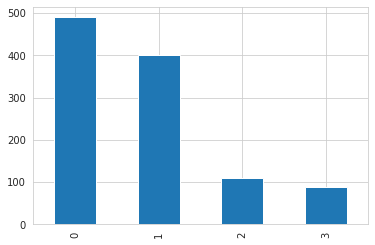

In [93]:
sns.set_style('whitegrid')
df_all_port_indexid['Target'].value_counts().plot(kind = 'bar')

In [94]:
#Criando o X e y
X = df_all_port_indexid.drop('Target', axis=1)
y = df_all_port_indexid['Target']

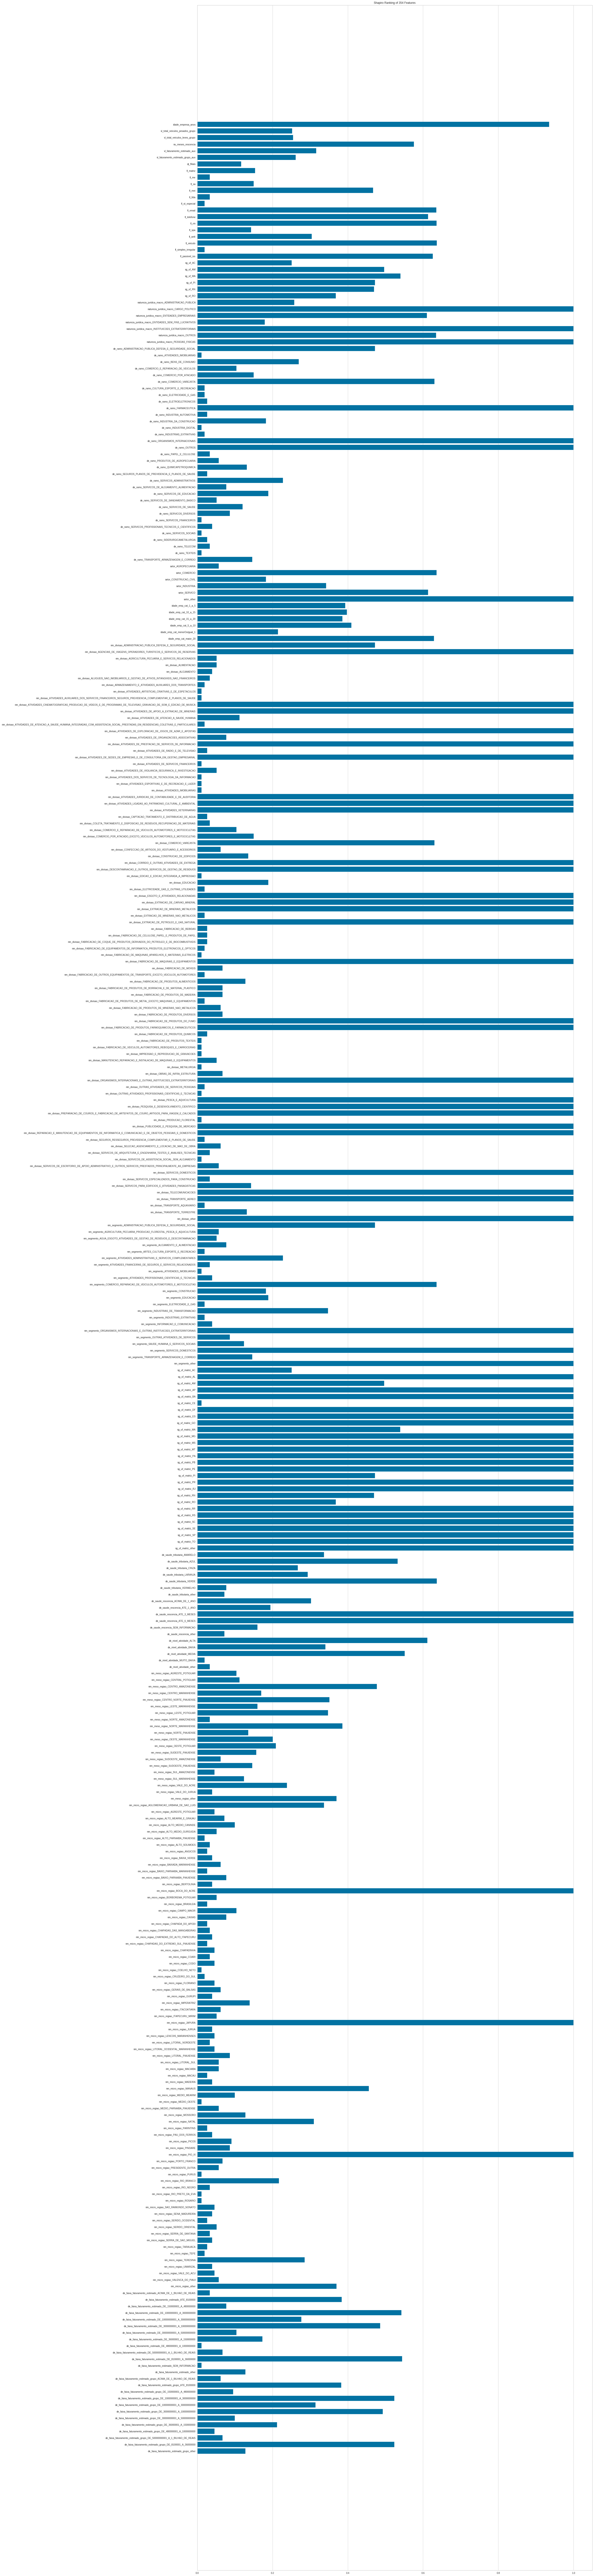

In [103]:
#Visualização da importancia das features usando Shapiro
from yellowbrick.features import Rank1D
# Criando o visualizador
visualizer = Rank1D(algorithm='shapiro')
plt.figure(figsize=(30,200))
visualizer.fit(X, y)           # Fit nos dados para o visualizer
visualizer.transform(X)        # Tranformando os dados
visualizer.show()              # Imprimindo as figuras

## Fazendo aprendizado supervisionado Classificação para aprender quem é do portfólio 1 e quem é do portfólio 2

### Separando a base em treino e teste

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Balanceando com RandomOverSampler

In [106]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [107]:
from tpot import TPOTClassifier

/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [108]:
tp = TPOTClassifier(generations=10, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [109]:
tp.fit(X_resampled, y_resampled)

Generation 1 - Current best internal CV score: 0.9631004917412685


TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(PCA(input_matrix, iterated_power=2, svd_solver=randomized), learning_rate=0.5, max_depth=1, max_features=0.6500000000000001, min_samples_leaf=3, min_samples_split=15, n_estimators=100, subsample=0.9000000000000001)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=10,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=42, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [110]:
#exportanod o modelo
tp.export('modelo.py')
with open('modelo.py') as pipe:
    print("".join(pipe.readlines()))

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.9631004917412685
exported_pipeline = make_pipeline(
    PCA(iterated_power=2, svd_solver="randomized"),
    GradientBoostingClassifier(learning_rate=0.5, max_depth=1, max_features=0.6500000000000001, min_samples_leaf=3, min_samples_split=15, n_estimators=100, subsample=0.9000000000000001)
)
# Fix random state fo

In [111]:
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from tpot.export_utils import set_param_recursive

In [112]:
exported_pipeline = make_pipeline(
    PCA(iterated_power=2, svd_solver="randomized"),
    GradientBoostingClassifier(learning_rate=0.5, max_depth=1, max_features=0.6500000000000001, min_samples_leaf=3, min_samples_split=15, n_estimators=100, subsample=0.9000000000000001)
)

In [115]:
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

model = exported_pipeline.fit(X_resampled, y_resampled)
results = exported_pipeline.predict(X_test)

## Curva ROC

/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


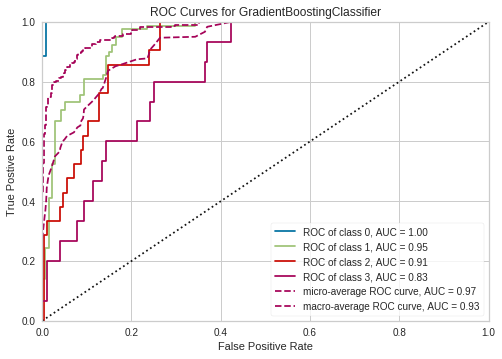

In [116]:
#Curva ROC e Area Abaixo da Curva
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam

visualizer = ROCAUC(model)
visualizer.fit(X_resampled, y_resampled)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [117]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [119]:
print(classification_report(y_pred=results, y_true=y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       104
           1       0.78      0.88      0.83        78
           2       0.44      0.33      0.38        21
           3       0.38      0.20      0.26        15

    accuracy                           0.84       218
   macro avg       0.64      0.60      0.62       218
weighted avg       0.82      0.84      0.82       218



In [120]:
confusion_matrix(y_pred=results, y_true=y_test)

array([[104,   0,   0,   0],
       [  1,  69,   6,   2],
       [  0,  11,   7,   3],
       [  0,   9,   3,   3]])

In [122]:
print("Acurácia (base de treinamento):", model.score(X_resampled, y_resampled))
print("Acurácia de previsão:", accuracy_score(y_test, results))

Acurácia (base de treinamento): 0.9974093264248705
Acurácia de previsão: 0.8394495412844036


In [123]:
from sklearn.metrics import r2_score

In [124]:
print('R2 score: {:.2f}'.format(r2_score(y_test, results)))

R2 score: 0.60


## Colocando Regularização L2 para evitar o overfitting

In [125]:
from sklearn.linear_model import Ridge, Lasso

In [126]:
ridge = Ridge().fit(X_resampled, y_resampled)
print("Ridge alpha=1")
print("Acurácia na base de treinamento: {:.2f}".format(ridge.score(X_resampled, y_resampled)))
print("Acurácia na base de teste: {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge alpha=10")
print("Acurácia na base de treinamento: {:.2f}".format(ridge10.score(X_resampled, y_resampled)))
print("Acurácia na base de teste: {:.2f}".format(ridge10.score(X_test, y_test)))


ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge alpha=0.1")
print("Acurácia na base de treinamento: {:.2f}".format(ridge01.score(X_resampled, y_resampled)))
print("Acurácia na base de teste: {:.2f}".format(ridge01.score(X_test, y_test)))


Ridge alpha=1
Acurácia na base de treinamento: 0.83
Acurácia na base de teste: 0.61
Ridge alpha=10
Acurácia na base de treinamento: 0.70
Acurácia na base de teste: 0.72
Ridge alpha=0.1
Acurácia na base de treinamento: 0.76
Acurácia na base de teste: 0.67


In [95]:
y_test.tail()

id
205dcd433329ad0a8b914b4ce399468389d3a256cdcbc5b8374a2fc2021971e7    1
28bc1d74d06eb184ee5a3ee242bae4492ad9df618c9c0fbcf442f22ad9ca6bae    1
9972062f53b10be62fea2303c52c15fd89674ce245f13b3db804f881eed7c654    1
ce2979f832ad09358b4458d514e4fc4af463cbcb778f1736cecd01a342f986a0    1
3af4369fa3199094e1738f9e21f73ca9f459c122ad4c4642b6704e23c9aebf85    1
Name: Target, dtype: int64

In [96]:
y_pred

array([0, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 3, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0,
       0, 2, 0, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 1, 0, 3, 0, 1, 2, 2,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0,
       2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 3, 3, 1, 0, 3, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 2, 0, 1, 1, 0, 2, 0, 1, 3, 0, 1, 2, 0, 1, 1, 1, 1, 1])

## Prevendo agora no market com a amostra tirada também do portfólio 1

In [127]:
amostra_port1.head()

id  idade_empresa_anos  \
490  7b31a8c2bf7011c7928cffb9f8225075e7ec2d638ce94e...            0.378017   
491  aeb22f0dffd6635c319d3de4e465d045b827b1ae490d84...           -0.337141   
492  73af4232ce27d5eefab9ccf9c77b3678b3beab9d675852...           -0.865674   
493  37a308088cc7793d61413571e197ecf18e4b9fbc96fa88...            2.233439   
494  a05a86ad99266c82bbb2a7019826ce2d8e64569cc3b4f5...           -0.674775   

     vl_total_veiculos_pesados_grupo  vl_total_veiculos_leves_grupo  \
490                        -0.049577                      -0.040442   
491                        -0.049577                      -0.040442   
492                        -0.049577                      -0.040442   
493                        -0.049577                      -0.040442   
494                        -0.049577                      -0.040442   

     nu_meses_rescencia  vl_faturamento_estimado_aux  \
490           -0.109560                    -0.019695   
491           -0.109560                    -0.019695   
492           -1.523591                    -0.019695   
493           -0.000788                    -0.019695   
494           -0.218332                     0.051460   

     vl_faturamento_estimado_grupo_aux  qt_filiais  fl_matriz  fl_me  fl_sa  \
490                          -0.048772   -0.061322          1      0      0   
491                          -0.048772   -0.061322          1      0      0   
492                          -0.048772   -0.061322          1      0      0   
493                          -0.048772   -0.061322          1      0      0   
494                          -0.048462   -0.061322          1      0      0   

     fl_mei  fl_ltda  fl_st_especial  fl_email  fl_telefone  fl_rm  fl_spa  \
490       0        0               0         0            0      0       0   
491       0        0               0         1            1      1       0   
492       1        0               0         1            1      1       0   
493       0        0               0         0            0      0       0   
494       0        0               0         1            1      1       0   

     fl_antt  fl_veiculo  fl_simples_irregular  fl_passivel_iss  sg_uf_AC  \
490        0           0                     0                0         0   
491        0           0                     0                0         0   
492        0           0                     0                0         0   
493        0           0                     0                1         0   
494        0           0                     0                0         0   

     sg_uf_AM  sg_uf_MA  sg_uf_PI  sg_uf_RN  sg_uf_RO  \
490         0         0         0         0         1   
491         0         1         0         0         0   
492         0         0         0         1         0   
493         1         0         0         0         0   
494         0         1         0         0         0   

     natureza_juridica_macro_ADMINISTRACAO_PUBLICA  \
490                                              0   
491                                              0   
492                                              0   
493                                              0   
494                                              0   

     natureza_juridica_macro_CARGO_POLITICO  \
490                                       0   
491                                       0   
492                                       0   
493                                       0   
494                                       0   

     natureza_juridica_macro_ENTIDADES_EMPRESARIAIS  \
490                                               0   
491                                               1   
492                                               0   
493                                               0   
494                                               0   

     natureza_juridica_macro_ENTIDADES_SEM_FINS_LUCRATIVOS  \
490                                                  0       
491   

In [128]:
amostra_port1_indexid = amostra_port1.copy()
amostra_port2_indexid = amostra_port2.copy()
amostra_port3_indexid = amostra_port3.copy()
amostra_port4_indexid = amostra_port4.copy()

In [129]:
amostra_port1_indexid.set_index('id', inplace=True)
amostra_port2_indexid.set_index('id', inplace=True)
amostra_port3_indexid.set_index('id', inplace=True)
amostra_port4_indexid.set_index('id', inplace=True)

In [130]:
merge_not.head()

idade_empresa_anos  vl_total_veiculos_pesados_grupo  \
0            0.468908                        -0.049577   
1           -0.882484                        -0.049577   
2           -0.296966                        -0.049577   
3           -0.357370                        -0.049577   
4           -0.701843                        -0.049577   

   vl_total_veiculos_leves_grupo  nu_meses_rescencia  \
0                      -0.040442           -0.218332   
1                      -0.040442           -1.741135   
2                      -0.040442            0.107983   
3                      -0.040442            0.107983   
4                      -0.040442            0.216755   

   vl_faturamento_estimado_aux  vl_faturamento_estimado_grupo_aux  qt_filiais  \
0                     0.077506                          -0.048349   -0.061322   
1                    -0.019695                          -0.048772   -0.061322   
2                    -0.025017                          -0.048795   -0.061322   
3                    -0.019695                          -0.048772   -0.061322   
4                    -0.019695                          -0.048772   -0.061322   

   fl_matriz  fl_me  fl_sa  fl_mei  fl_ltda  fl_st_especial  fl_email  \
0          1      0      0       0        0               0         1   
1          1      0      0       1        0               0         1   
2          1      0      0       1        0               0         0   
3          1      0      0       0        0               0         1   
4          1      0      0       0        0               0         1   

   fl_telefone  fl_rm  fl_spa  fl_antt  fl_veiculo  fl_simples_irregular  \
0            1      1       0        0           0                     0   
1            1      1       0        0           0                     0   
2            1      1       0        0           0                     0   
3            1      1       0        0           0                     0   
4            1      1       0        0           0                     0   

   fl_passivel_iss  sg_uf_AC  sg_uf_AM  sg_uf_MA  sg_uf_PI  sg_uf_RN  \
0                1         0         0         0         0         1   
1                1         0         0         0         1         0   
2                1         0         1         0         0         0   
3                1         0         1         0         0         0   
4                1         0         0         0         0         1   

   sg_uf_RO  natureza_juridica_macro_ADMINISTRACAO_PUBLICA  \
0         0                                              0   
1         0                                              0   
2         0                                              0   
3         0                                              0   
4         0                                              0   

   natureza_juridica_macro_CARGO_POLITICO  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   natureza_juridica_macro_ENTIDADES_EMPRESARIAIS  \
0                                               1   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   natureza_juridica_macro_ENTIDADES_SEM_FINS_LUCRATIVOS  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   natureza_juridica_macro_INSTITUICOES_EXTRATERRITORIAIS  \
0                                                  0        
1                                                  0   

In [132]:
just_market_indexid = merge_not.copy()

In [133]:
just_market_indexid.set_index('id', inplace=True)

In [134]:
base_test_all_port= pd.concat([amostra_port1_indexid,amostra_port2_indexid,amostra_port3_indexid,amostra_port4_indexid, just_market_indexid],axis=0)

In [135]:
base_test_all_port.shape

(461210, 354)

In [136]:
amostra_port2_indexid.shape

(58, 354)

In [137]:
X_test_base = base_test_all_port

In [138]:
y_pred_test = exported_pipeline.predict(X_test_base)

In [139]:
pd.DataFrame(y_pred_test)[0].value_counts()

0    454122
1      6826
2       175
3        87
Name: 0, dtype: int64

## Criando um y_test com as amostras para ver a acurácia 

In [140]:
amostra_port1_indexid_target = amostra_port1_indexid.copy()
amostra_port2_indexid_target = amostra_port2_indexid.copy()
amostra_port3_indexid_target = amostra_port3_indexid.copy()
amostra_port4_indexid_target = amostra_port4_indexid.copy()

In [141]:
amostra_port1_indexid_target['Target'] = 0
amostra_port2_indexid_target['Target'] = 1
amostra_port3_indexid_target['Target'] = 2
amostra_port4_indexid_target['Target'] = 3

In [142]:
base_y_test_all_port = pd.concat([amostra_port1_indexid_target,amostra_port2_indexid_target,amostra_port3_indexid_target,amostra_port4_indexid_target],axis=0)

In [143]:
base_y_test_all_port.head()

idade_empresa_anos  \
id                                                                       
7b31a8c2bf7011c7928cffb9f8225075e7ec2d638ce94e0...            0.378017   
aeb22f0dffd6635c319d3de4e465d045b827b1ae490d844...           -0.337141   
73af4232ce27d5eefab9ccf9c77b3678b3beab9d675852c...           -0.865674   
37a308088cc7793d61413571e197ecf18e4b9fbc96fa884...            2.233439   
a05a86ad99266c82bbb2a7019826ce2d8e64569cc3b4f5b...           -0.674775   

                                                    vl_total_veiculos_pesados_grupo  \
id                                                                                    
7b31a8c2bf7011c7928cffb9f8225075e7ec2d638ce94e0...                        -0.049577   
aeb22f0dffd6635c319d3de4e465d045b827b1ae490d844...                        -0.049577   
73af4232ce27d5eefab9ccf9c77b3678b3beab9d675852c...                        -0.049577   
37a308088cc7793d61413571e197ecf18e4b9fbc96fa884...                        -0.049577   
a05a86ad99266c82bbb2a7019826ce2d8e64569cc3b4f5b...                        -0.049577   

                                                    vl_total_veiculos_leves_grupo  \
id                                                                                  
7b31a8c2bf7011c7928cffb9f8225075e7ec2d638ce94e0...                      -0.040442   
aeb22f0dffd6635c319d3de4e465d045b827b1ae490d844...                      -0.040442   
73af4232ce27d5eefab9ccf9c77b3678b3beab9d675852c...                      -0.040442   
37a308088cc7793d61413571e197ecf18e4b9fbc96fa884...                      -0.040442   
a05a86ad99266c82bbb2a7019826ce2d8e64569cc3b4f5b...                      -0.040442   

                                                    nu_meses_rescencia  \
id                                                                       
7b31a8c2bf7011c7928cffb9f8225075e7ec2d638ce94e0...           -0.109560   
aeb22f0dffd6635c319d3de4e465d045b827b1ae490d844...           -0.109560   
73af4232ce27d5eefab9ccf9c77b3678b3beab9d675852c...           -1.523591   
37a308088cc7793d61413571e197ecf18e4b9fbc96fa884...           -0.000788   
a05a86ad99266c82bbb2a7019826ce2d8e64569cc3b4f5b...           -0.218332   

                                                    vl_faturamento_estimado_aux  \
id                                                                                
7b31a8c2bf7011c7928cffb9f8225075e7ec2d638ce94e0...                    -0.019695   
aeb22f0dffd6635c319d3de4e465d045b827b1ae490d844...                    -0.019695   
73af4232ce27d5eefab9ccf9c77b3678b3beab9d675852c...                    -0.019695   
37a308088cc7793d61413571e197ecf18e4b9fbc96fa884...                    -0.019695   
a05a86ad99266c82bbb2a7019826ce2d8e64569cc3b4f5b...                     0.051460   

                                                    vl_faturamento_estimado_grupo_aux  \
id                                                                                      
7b31a8c2bf7011c7928cffb9f8225075e7ec2d638ce94e0...                          -0.048772   
aeb22f0dffd6635c319d3de4e465d045b827b1ae490d844...                          -0.048772   
73af4232ce27d5eefab9ccf9c77b3678b3beab9d675852c...                          -0.048772   
37a308088cc7793d61413571e197ecf18e4b9fbc96fa884...                          -0.048772   
a05a86ad99266c82bbb2a7019826ce2d8e64569cc3b4f5b...                          -0.048462   

                                                    qt_filiais  fl_matriz  \
id                                                                          
7b31a8c2bf7011c7928cffb9f8225075e7ec2d638ce94e0...   -0.061322          1   
aeb22f0dffd6635c319d3de4e465d045b827b1ae490d844...   -0.061322          1   
73af4232ce27d5eefab9ccf9c77b3678b3beab9d675852c...   -0.061322          1   
37a308088cc7793d61413571e197ecf18e4b9fbc96fa884...   -0.061322          1   
a05a86ad99266c82bbb2a7019826ce2d8e64569cc3b4f5b...   -0.061322          1   

                                                    fl_me  fl_

In [144]:
base_y_test_all_port.shape

(190, 355)

In [145]:
y_pred_test_test = pd.DataFrame(y_pred_test, columns = ['Target'])[:190]

In [146]:
print("Acurácia de previsão:", accuracy_score(base_y_test_all_port['Target'], y_pred_test_test['Target']))

Acurácia de previsão: 0.6842105263157895


## Tirando as features não importantes para a target

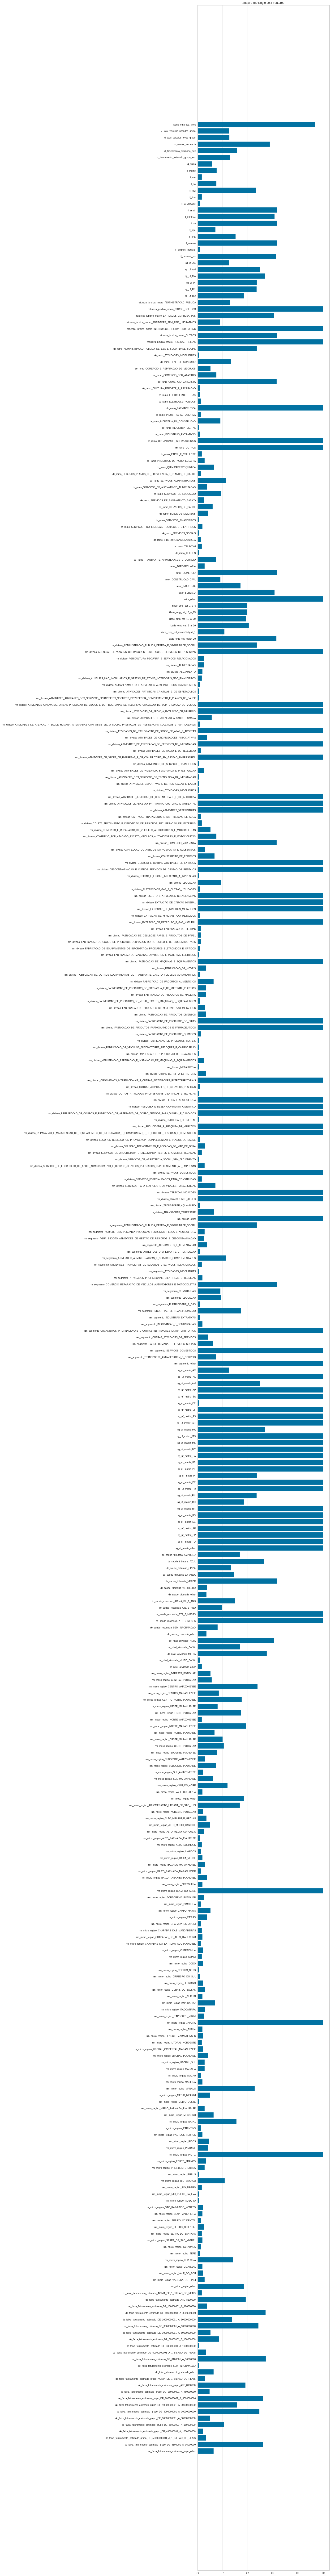

In [148]:
#Visualização da importancia das features usando Shapiro
from yellowbrick.features import Rank1D
# Criando o visualizador
visualizer = Rank1D(algorithm='shapiro')
plt.figure(figsize=(10,200))
visualizer.fit(X, y)           # Fit nos dados para o visualizer
visualizer.transform(X)        # Tranformando os dados
visualizer.show()  

In [149]:
df_all_no_features = df_all_port_indexid.copy()

In [151]:
pd.set_option('display.max_rows', 500)

In [200]:
df_all_no_features.columns[255:]

Index(['nm_micro_regiao_AGLOMERACAO_URBANA_DE_SAO_LUIS',
       'nm_micro_regiao_AGRESTE_POTIGUAR',
       'nm_micro_regiao_ALTO_MEARIM_E_GRAJAU',
       'nm_micro_regiao_ALTO_MEDIO_CANINDE',
       'nm_micro_regiao_ALTO_MEDIO_GURGUEIA',
       'nm_micro_regiao_ALTO_PARNAIBA_PIAUIENSE',
       'nm_micro_regiao_ALTO_SOLIMOES', 'nm_micro_regiao_ANGICOS',
       'nm_micro_regiao_BAIXA_VERDE', 'nm_micro_regiao_BAIXADA_MARANHENSE',
       'nm_micro_regiao_BAIXO_PARNAIBA_MARANHENSE',
       'nm_micro_regiao_BAIXO_PARNAIBA_PIAUIENSE',
       'nm_micro_regiao_BERTOLINIA', 'nm_micro_regiao_BOCA_DO_ACRE',
       'nm_micro_regiao_BORBOREMA_POTIGUAR', 'nm_micro_regiao_BRASILEIA',
       'nm_micro_regiao_CAMPO_MAIOR', 'nm_micro_regiao_CAXIAS',
       'nm_micro_regiao_CHAPADA_DO_APODI',
       'nm_micro_regiao_CHAPADAS_DAS_MANGABEIRAS',
       'nm_micro_regiao_CHAPADAS_DO_ALTO_ITAPECURU',
       'nm_micro_regiao_CHAPADAS_DO_EXTREMO_SUL_PIAUIENSE',
       'nm_micro_regiao_CHAPADINHA', 'nm_micro_regia

In [202]:
df_all_no_features.drop(['vl_total_veiculos_pesados_grupo',
       'vl_total_veiculos_leves_grupo', 'nu_meses_rescencia',
       'vl_faturamento_estimado_aux', 'vl_faturamento_estimado_grupo_aux',
       'qt_filiais', 'fl_matriz', 'fl_me', 'fl_sa','fl_mei','fl_ltda','fl_st_especial',
                        'fl_spa','fl_antt','fl_simples_irregular','natureza_juridica_macro_ADMINISTRACAO_PUBLICA',
                        'natureza_juridica_macro_ENTIDADES_SEM_FINS_LUCRATIVOS', 'de_ramo_ATIVIDADES_IMOBILIARIAS', 'de_ramo_BENS_DE_CONSUMO',
       'de_ramo_COMERCIO_E_REPARACAO_DE_VEICULOS',
       'de_ramo_COMERCIO_POR_ATACADO','de_ramo_CULTURA_ESPORTE_E_RECREACAO', 'de_ramo_ELETRICIDADE_E_GAS',
       'de_ramo_ELETROELETRONICOS','de_ramo_INDUSTRIA_AUTOMOTIVA', 'de_ramo_INDUSTRIA_DA_CONSTRUCAO',
       'de_ramo_INDUSTRIA_DIGITAL', 'de_ramo_INDUSTRIAS_EXTRATIVAS','de_ramo_PAPEL_E_CELULOSE',
       'de_ramo_PRODUTOS_DE_AGROPECUARIA', 'de_ramo_QUIMICAPETROQUIMICA',
       'de_ramo_SEGUROS_PLANOS_DE_PREVIDENCIA_E_PLANOS_DE_SAUDE',
       'de_ramo_SERVICOS_ADMINISTRATIVOS','de_ramo_SERVICOS_DE_ALOJAMENTO_ALIMENTACAO',
       'de_ramo_SERVICOS_DE_EDUCACAO', 'de_ramo_SERVICOS_DE_SANEAMENTO_BASICO',
       'de_ramo_SERVICOS_DE_SAUDE', 'de_ramo_SERVICOS_DIVERSOS','de_ramo_SERVICOS_FINANCEIROS',
       'de_ramo_SERVICOS_PROFISSIONAIS_TECNICOS_E_CIENTIFICOS',
       'de_ramo_SERVICOS_SOCIAIS', 'de_ramo_SIDERURGICAMETALURGIA',
       'de_ramo_TELECOM', 'de_ramo_TEXTEIS',
       'de_ramo_TRANSPORTE_ARMAZENAGEM_E_CORREIO', 'setor_AGROPECUARIA','setor_CONSTRUCAO_CIVIL', 'setor_INDUSTRIA','nm_divisao_AGRICULTURA_PECUARIA_E_SERVICOS_RELACIONADOS',
       'nm_divisao_ALIMENTACAO', 'nm_divisao_ALOJAMENTO',
       'nm_divisao_ALUGUEIS_NAO_IMOBILIARIOS_E_GESTAO_DE_ATIVOS_INTANGIVEIS_NAO_FINANCEIROS','nm_divisao_ARMAZENAMENTO_E_ATIVIDADES_AUXILIARES_DOS_TRANSPORTES',
       'nm_divisao_ATIVIDADES_ARTISTICAS_CRIATIVAS_E_DE_ESPETACULOS',
       'nm_divisao_ATIVIDADES_AUXILIARES_DOS_SERVICOS_FINANCEIROS_SEGUROS_PREVIDENCIA_COMPLEMENTAR_E_PLANOS_DE_SAUDE','nm_divisao_ATIVIDADES_DE_ATENCAO_A_SAUDE_HUMANA',
       'nm_divisao_ATIVIDADES_DE_ATENCAO_A_SAUDE_HUMANA_INTEGRADAS_COM_ASSISTENCIA_SOCIAL_PRESTADAS_EM_RESIDENCIAS_COLETIVAS_E_PARTICULARES','nm_divisao_ATIVIDADES_DE_ORGANIZACOES_ASSOCIATIVAS',
                        'nm_divisao_ATIVIDADES_DE_RADIO_E_DE_TELEVISAO','nm_divisao_ATIVIDADES_DE_SERVICOS_FINANCEIROS',
       'nm_divisao_ATIVIDADES_DE_VIGILANCIA_SEGURANCA_E_INVESTIGACAO',
       'nm_divisao_ATIVIDADES_DOS_SERVICOS_DE_TECNOLOGIA_DA_INFORMACAO','nm_divisao_ATIVIDADES_ESPORTIVAS_E_DE_RECREACAO_E_LAZER',
       'nm_divisao_ATIVIDADES_IMOBILIARIAS','nm_divisao_CAPTACAO_TRATAMENTO_E_DISTRIBUICAO_DE_AGUA',
       'nm_divisao_COLETA_TRATAMENTO_E_DISPOSICAO_DE_RESIDUOS_RECUPERACAO_DE_MATERIAIS',
       'nm_divisao_COMERCIO_E_REPARACAO_DE_VEICULOS_AUTOMOTORES_E_MOTOCICLETAS','nm_divisao_CONFECCAO_DE_ARTIGOS_DO_VESTUARIO_E_ACESSORIOS',
       'nm_divisao_CONSTRUCAO_DE_EDIFICIOS','nm_divisao_EDICAO_E_EDICAO_INTEGRADA_A_IMPRESSAO',
       'nm_divisao_EDUCACAO',
       'nm_divisao_ELETRICIDADE_GAS_E_OUTRAS_UTILIDADES','nm_divisao_EXTRACAO_DE_MINERAIS_NAO_METALICOS',
                        'nm_divisao_FABRICACAO_DE_BEBIDAS',
       'nm_divisao_FABRICACAO_DE_CELULOSE_PAPEL_E_PRODUTOS_DE_PAPEL',
       'nm_divisao_FABRICACAO_DE_COQUE_DE_PRODUTOS_DERIVADOS_DO_PETROLEO_E_DE_BIOCOMBUSTIVEIS',
       'nm_divisao_FABRICACAO_DE_EQUIPAMENTOS_DE_INFORMATICA_PRODUTOS_ELETRONICOS_E_OPTICOS','nm_divisao_FABRICACAO_DE_MAQUINAS_APARELHOS_E_MATERIAIS_ELETRICOS',
                        'nm_divisao_FABRICACAO_DE_MOVEIS',
       'nm_divisao_FABRICACAO_DE_OUTROS_EQUIPAMENTOS_DE_TRANSPORTE_EXCETO_VEICULOS_AUTOMOTORES',
       'nm_divisao_FABRICACAO_DE_PRODUTOS_ALIMENTICIOS',
       'nm_divisao_FABRICACAO_DE_PRODUTOS_DE_BORRACHA_E_DE_MATERIAL_PLASTICO',
       'nm_divisao_FABRICACAO_DE_PRODUTOS_DE_MADEIRA',
       'nm_divisao_FABRICACAO_DE_PRODUTOS_DE_METAL_EXCETO_MAQUINAS_E_EQUIPAMENTOS',
       'nm_divisao_FABRICACAO_DE_PRODUTOS_DE_MINERAIS_NAO_METALICOS',
       'nm_divisao_FABRICACAO_DE_PRODUTOS_DIVERSOS','nm_divisao_FABRICACAO_DE_PRODUTOS_QUIMICOS',
       'nm_divisao_FABRICACAO_DE_PRODUTOS_TEXTEIS',
       'nm_divisao_FABRICACAO_DE_VEICULOS_AUTOMOTORES_REBOQUES_E_CARROCERIAS',
       'nm_divisao_IMPRESSAO_E_REPRODUCAO_DE_GRAVACOES',
       'nm_divisao_MANUTENCAO_REPARACAO_E_INSTALACAO_DE_MAQUINAS_E_EQUIPAMENTOS',
       'nm_divisao_METALURGIA', 'nm_divisao_OBRAS_DE_INFRA_ESTRUTURA','nm_divisao_OUTRAS_ATIVIDADES_DE_SERVICOS_PESSOAIS',
       'nm_divisao_OUTRAS_ATIVIDADES_PROFISSIONAIS_CIENTIFICAS_E_TECNICAS','nm_divisao_PRODUCAO_FLORESTAL',
                        'nm_divisao_SEGUROS_RESSEGUROS_PREVIDENCIA_COMPLEMENTAR_E_PLANOS_DE_SAUDE',
       'nm_divisao_SELECAO_AGENCIAMENTO_E_LOCACAO_DE_MAO_DE_OBRA',
       'nm_divisao_SERVICOS_DE_ARQUITETURA_E_ENGENHARIA_TESTES_E_ANALISES_TECNICAS',
       'nm_divisao_SERVICOS_DE_ASSISTENCIA_SOCIAL_SEM_ALOJAMENTO',
       'nm_divisao_SERVICOS_DE_ESCRITORIO_DE_APOIO_ADMINISTRATIVO_E_OUTROS_SERVICOS_PRESTADOS_PRINCIPALMENTE_AS_EMPRESAS','nm_divisao_SERVICOS_ESPECIALIZADOS_PARA_CONSTRUCAO',
       'nm_divisao_SERVICOS_PARA_EDIFICIOS_E_ATIVIDADES_PAISAGISTICAS','nm_divisao_TRANSPORTE_AQUAVIARIO', 'nm_divisao_TRANSPORTE_TERRESTRE',
                        'nm_segmento_AGRICULTURA_PECUARIA_PRODUCAO_FLORESTAL_PESCA_E_AQUICULTURA',
       'nm_segmento_AGUA_ESGOTO_ATIVIDADES_DE_GESTAO_DE_RESIDUOS_E_DESCONTAMINACAO',
       'nm_segmento_ALOJAMENTO_E_ALIMENTACAO',
       'nm_segmento_ARTES_CULTURA_ESPORTE_E_RECREACAO',
       'nm_segmento_ATIVIDADES_ADMINISTRATIVAS_E_SERVICOS_COMPLEMENTARES',
       'nm_segmento_ATIVIDADES_FINANCEIRAS_DE_SEGUROS_E_SERVICOS_RELACIONADOS',
       'nm_segmento_ATIVIDADES_IMOBILIARIAS','nm_segmento_ATIVIDADES_PROFISSIONAIS_CIENTIFICAS_E_TECNICAS','nm_segmento_CONSTRUCAO', 'nm_segmento_EDUCACAO',
       'nm_segmento_ELETRICIDADE_E_GAS',
       'nm_segmento_INDUSTRIAS_DE_TRANSFORMACAO',
       'nm_segmento_INDUSTRIAS_EXTRATIVAS',
       'nm_segmento_INFORMACAO_E_COMUNICACAO','nm_segmento_OUTRAS_ATIVIDADES_DE_SERVICOS',
       'nm_segmento_SAUDE_HUMANA_E_SERVICOS_SOCIAIS','nm_segmento_TRANSPORTE_ARMAZENAGEM_E_CORREIO','de_saude_tributaria_VERMELHO', 'de_saude_tributaria_other',
                        'de_saude_rescencia_SEM_INFORMACAO', 'de_saude_rescencia_other','de_nivel_atividade_MUITO_BAIXA',
       'de_nivel_atividade_other', 'nm_meso_regiao_AGRESTE_POTIGUAR',
       'nm_meso_regiao_CENTRAL_POTIGUAR','nm_micro_regiao_AGRESTE_POTIGUAR',
       'nm_micro_regiao_ALTO_MEARIM_E_GRAJAU',
       'nm_micro_regiao_ALTO_MEDIO_CANINDE',
       'nm_micro_regiao_ALTO_MEDIO_GURGUEIA','nm_micro_regiao_ALTO_PARNAIBA_PIAUIENSE',
       'nm_micro_regiao_ALTO_SOLIMOES', 'nm_micro_regiao_ANGICOS',
       'nm_micro_regiao_BAIXA_VERDE', 'nm_micro_regiao_BAIXADA_MARANHENSE',
       'nm_micro_regiao_BAIXO_PARNAIBA_MARANHENSE',
       'nm_micro_regiao_BAIXO_PARNAIBA_PIAUIENSE',
       'nm_micro_regiao_BERTOLINIA','nm_micro_regiao_BORBOREMA_POTIGUAR', 'nm_micro_regiao_BRASILEIA',
       'nm_micro_regiao_CAMPO_MAIOR', 'nm_micro_regiao_CAXIAS',
       'nm_micro_regiao_CHAPADA_DO_APODI',
       'nm_micro_regiao_CHAPADAS_DAS_MANGABEIRAS',
       'nm_micro_regiao_CHAPADAS_DO_ALTO_ITAPECURU',
       'nm_micro_regiao_CHAPADAS_DO_EXTREMO_SUL_PIAUIENSE',
       'nm_micro_regiao_CHAPADINHA', 'nm_micro_regiao_COARI',
       'nm_micro_regiao_CODO', 'nm_micro_regiao_COELHO_NETO',
       'nm_micro_regiao_CRUZEIRO_DO_SUL', 'nm_micro_regiao_FLORIANO',
       'nm_micro_regiao_GERAIS_DE_BALSAS', 'nm_micro_regiao_GURUPI',
       'nm_micro_regiao_IMPERATRIZ', 'nm_micro_regiao_ITACOATIARA',
       'nm_micro_regiao_ITAPECURU_MIRIM','nm_micro_regiao_JURUA', 'nm_micro_regiao_LENCOIS_MARANHENSES',
       'nm_micro_regiao_LITORAL_NORDESTE',
       'nm_micro_regiao_LITORAL_OCIDENTAL_MARANHENSE',
       'nm_micro_regiao_LITORAL_PIAUIENSE', 'nm_micro_regiao_LITORAL_SUL',
       'nm_micro_regiao_MACAIBA', 'nm_micro_regiao_MACAU',
       'nm_micro_regiao_MADEIRA','nm_micro_regiao_PORTO_FRANCO', 'nm_micro_regiao_PRESIDENTE_DUTRA',
       'nm_micro_regiao_PURUS', 'nm_micro_regiao_RIO_BRANCO',
        'nm_micro_regiao_RIO_PRETO_DA_EVA',
       'nm_micro_regiao_ROSARIO', 'nm_micro_regiao_SAO_RAIMUNDO_NONATO',
       'nm_micro_regiao_SENA_MADUREIRA', 'nm_micro_regiao_SERIDO_OCIDENTAL',
       'nm_micro_regiao_SERIDO_ORIENTAL', 'nm_micro_regiao_SERRA_DE_SANTANA',
       'nm_micro_regiao_SERRA_DE_SAO_MIGUEL', 'nm_micro_regiao_TARAUACA',
       'nm_micro_regiao_TEFE'],axis=1, inplace=True )

In [203]:
df_all_no_features.shape

(1088, 171)

In [204]:
#Criando o X e y
X = df_all_no_features.drop('Target', axis=1)
y = df_all_no_features['Target']

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [206]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [207]:
tp = TPOTClassifier(generations=10, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [208]:
tp.fit(X_resampled, y_resampled)

Generation 1 - Current best internal CV score: 0.9546862522590679
Generation 2 - Current best internal CV score: 0.9546862522590679
Generation 3 - Current best internal CV score: 0.9546862522590679
Generation 4 - Current best internal CV score: 0.9546862522590679
Generation 5 - Current best internal CV score: 0.9546862522590679
Generation 6 - Current best internal CV score: 0.9546862522590679
Generation 7 - Current best internal CV score: 0.963747740932207


TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GaussianNB(PolynomialFeatures(RandomForestClassifier(ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.8, min_samples_leaf=1, min_samples_split=13, n_estimators=100), bootstrap=False, criterion=gini, max_features=0.45, min_samples_leaf=3, min_samples_split=7, n_estimators=100), degree=2, include_bias=False, interaction_only=False))


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=10,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=42, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [209]:
#exportanod o modelo
tp.export('modelo.py')
with open('modelo.py') as pipe:
    print("".join(pipe.readlines()))

import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.963747740932207
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=True, criterion="gini", max_features=0.8, min_samples_leaf=1, min_s

In [211]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

In [212]:
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=True, criterion="gini", max_features=0.8, min_samples_leaf=1, min_samples_split=13, n_estimators=100)),
    StackingEstimator(estimator=RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.45, min_samples_leaf=3, min_samples_split=7, n_estimators=100)),
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    GaussianNB()
)

In [213]:
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

model = exported_pipeline.fit(X_resampled, y_resampled)
y_pred = exported_pipeline.predict(X_test)

/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


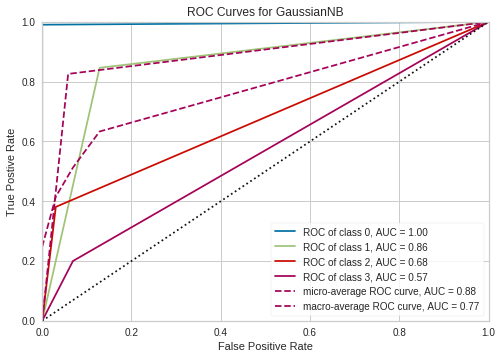

In [214]:
#Curva ROC e Area Abaixo da Curva
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam

visualizer = ROCAUC(model)
visualizer.fit(X_resampled, y_resampled)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [215]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       104
           1       0.79      0.85      0.81        78
           2       0.57      0.38      0.46        21
           3       0.18      0.20      0.19        15

    accuracy                           0.83       218
   macro avg       0.63      0.60      0.61       218
weighted avg       0.83      0.83      0.82       218



In [216]:
print("Acurácia (base de treinamento):", model.score(X_resampled, y_resampled))
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))

Acurácia (base de treinamento): 0.9980569948186528
Acurácia de previsão: 0.8256880733944955


In [217]:
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred)))

R2 score: 0.47
